In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
from termcolor import colored as cl 
import numpy as np
import os 

In [2]:

a, b, c= 3, 4, 5
d= {'A': a, 'B': b, 'C': c}


d = pd.DataFrame([d])
data= pd.DataFrame() 
data= pd.concat([data, d])
data

,A,B,C
0,3,4,5


In [3]:
df= pd.read_csv(r'data\ohlc.csv')
df= df[['Datetime', 'Open', 'Close', 'High', 'Low', 'Volume']]
df = df.set_index('Datetime')
df.to_csv('msft.csv')
df = pd.read_csv('msft.csv')
os.remove('msft.csv')
df['Datetime']= pd.to_datetime(df['Datetime'])
df

,Datetime,Open,Close,High,Low,Volume
0,2022-10-03 11:13:00,36.00,36.00,36.00,36.00,975
1,2022-10-10 12:08:00,34.00,34.00,34.00,34.00,975
2,2022-10-10 13:05:00,36.00,36.00,36.00,36.00,975
3,2022-10-11 09:25:00,35.00,35.00,35.00,35.00,975
4,2022-10-11 10:14:00,32.00,32.00,32.00,32.00,975
5,2022-10-11 10:35:00,30.95,30.95,30.95,30.95,975
6,2022-10-11 12:34:00,31.20,31.20,31.20,31.20,975
7,2022-10-11 13:34:00,29.20,29.20,29.20,29.20,975
8,2022-10-11 13:37:00,28.00,28.00,28.00,28.00,975
9,2022-10-11 14:16:00,28.25,28.80,28.80,28.25,1950


In [4]:
def sma(data, n):
            sma = data.rolling(window = n).mean()
            return pd.DataFrame(sma)

n = [20, 50]
for i in n:
    df[f'sma_{i}'] = sma(df['Close'], i)
df['sma_20'].fillna(0, inplace=True)
df['sma_50'].fillna(0, inplace=True)
df['sma_20'].apply(lambda a:"{0:.10f}".format(a))
df['sma_50'].apply(lambda a:"{0:.10f}".format(a))
df['sma_20']

0      0.0000
1      0.0000
2      0.0000
3      0.0000
4      0.0000
5      0.0000
6      0.0000
7      0.0000
8      0.0000
9      0.0000
10     0.0000
11     0.0000
12     0.0000
13     0.0000
14     0.0000
15     0.0000
16     0.0000
17     0.0000
18     0.0000
19    30.5150
20    30.1900
21    29.9650
22    29.6650
23    29.3200
24    29.1450
25    29.0225
26    29.0500
27    29.1850
28    29.4100
29    29.5700
30    29.7075
31    29.9300
32    29.8900
33    30.1900
34    30.4400
35    30.6200
36    30.8000
37    30.9425
38    31.1700
39    31.5200
40    31.8550
41    32.1800
42    32.4700
43    32.7350
44    32.9200
45    33.1700
Name: sma_20, dtype: float64

## Strategy

In [5]:
sma1 = df['sma_20']
sma2= df['sma_50']
buy_price = []
sell_price = []
sma_signal = []
signal = 0

In [6]:
for s, t in zip(sma1, sma2): 
    print(s, t)

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
30.514999999999997 0.0
30.189999999999998 0.0
29.964999999999996 0.0
29.665 0.0
29.32 0.0
29.145 0.0
29.022499999999997 0.0
29.05 0.0
29.184999999999995 0.0
29.409999999999997 0.0
29.57 0.0
29.7075 0.0
29.93 0.0
29.890000000000004 0.0
30.190000000000005 0.0
30.440000000000005 0.0
30.620000000000005 0.0
30.8 0.0
30.942500000000003 0.0
31.170000000000005 0.0
31.520000000000003 0.0
31.855 0.0
32.18 0.0
32.470000000000006 0.0
32.735 0.0
32.92 0.0
33.17 0.0


In [7]:
for row,s, t in zip(df.iterrows(), sma1, sma2):
    print(s, t)
    if s > t:
        if signal != 1:
            buy_price.append(row)
            sell_price.append(np.nan)
            signal = 1
            sma_signal.append(signal)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            sma_signal.append(0)
    elif t > s:
        if signal != -1:
            buy_price.append(np.nan)
            sell_price.append(row)
            signal = -1
            sma_signal.append(-1)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            sma_signal.append(0)
    else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        sma_signal.append(0)

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
30.514999999999997 0.0
30.189999999999998 0.0
29.964999999999996 0.0
29.665 0.0
29.32 0.0
29.145 0.0
29.022499999999997 0.0
29.05 0.0
29.184999999999995 0.0
29.409999999999997 0.0
29.57 0.0
29.7075 0.0
29.93 0.0
29.890000000000004 0.0
30.190000000000005 0.0
30.440000000000005 0.0
30.620000000000005 0.0
30.8 0.0
30.942500000000003 0.0
31.170000000000005 0.0
31.520000000000003 0.0
31.855 0.0
32.18 0.0
32.470000000000006 0.0
32.735 0.0
32.92 0.0
33.17 0.0


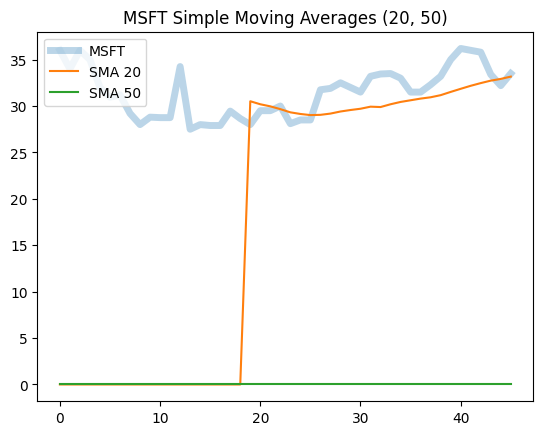

In [8]:
plt.plot(df['Close'], label = 'MSFT', linewidth = 5, alpha = 0.3)
plt.plot(df['sma_20'], label = 'SMA 20')
plt.plot(df['sma_50'], label = 'SMA 50')
plt.title('MSFT Simple Moving Averages (20, 50)')
plt.legend(loc = 'upper left')
plt.show()

c:\Users\kirti\Automated Trading_simulation\venv\lib\site-packages\numpy\ma\core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: setting an array element with a sequence.

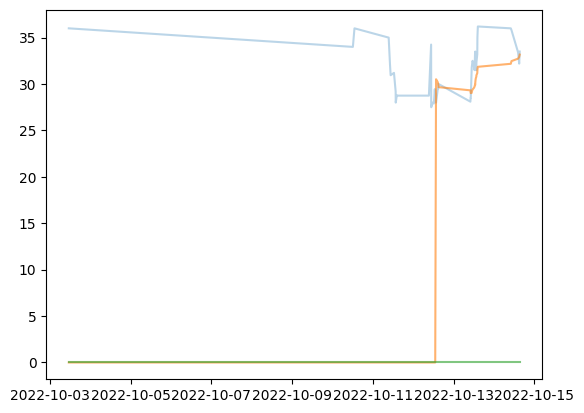

In [9]:
msft= df.copy() 
msft.set_index('Datetime', inplace=True)
plt.plot(msft['Close'], alpha = 0.3, label = 'MSFT')
plt.plot(msft['sma_20'], alpha = 0.6, label = 'SMA 20')
plt.plot(msft['sma_50'] , alpha = 0.6, label = 'SMA 50')
plt.scatter(msft.index, buy_price, marker = '^', s = 200, color = 'darkblue', label = 'BUY SIGNAL')
plt.scatter(msft.index, sell_price , marker = 'v', s = 200, color = 'crimson', label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('MSFT SMA CROSSOVER TRADING SIGNALS')
plt.savefig("{% static 'plot.png' %}")
plt.show()

## ADX & RSI

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from math import floor
from termcolor import colored as cl

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,10)

In [ ]:
data= pd.read_csv('data/ohlc.csv')
data=data[['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume']]
data.head()

,Datetime,Open,High,Low,Close,Volume
0,2022-10-03T11:13:00,36.0,36.0,36.0,36.0,975
1,2022-10-10T12:08:00,34.0,34.0,34.0,34.0,975
2,2022-10-10T13:05:00,36.0,36.0,36.0,36.0,975
3,2022-10-11T09:25:00,35.0,35.0,35.0,35.0,975
4,2022-10-11T10:14:00,32.0,32.0,32.0,32.0,975


In [ ]:
data= df.copy()

In [ ]:
def get_adx(high, low, Close, lookback):
    plus_dm = high.diff()
    minus_dm = low.diff()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm > 0] = 0
    
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - Close.shift(1)))
    tr3 = pd.DataFrame(abs(low - Close.shift(1)))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.rolling(lookback).mean()
    
    plus_di = 100 * (plus_dm.ewm(alpha = 1/lookback).mean() / atr)
    minus_di = abs(100 * (minus_dm.ewm(alpha = 1/lookback).mean() / atr))
    dx = (abs(plus_di - minus_di) / abs(plus_di + minus_di)) * 100
    adx = ((dx.shift(1) * (lookback - 1)) + dx) / lookback
    adx_smooth = adx.ewm(alpha = 1/lookback).mean()
    return plus_di, minus_di, adx_smooth

data['plus_di'] = pd.DataFrame(get_adx(data['High'], data['Low'], data['Close'], 14)[0]).rename(columns = {0:'plus_di'})
data['minus_di'] = pd.DataFrame(get_adx(data['High'], data['Low'], data['Close'], 14)[1]).rename(columns = {0:'minus_di'})
data['adx'] = pd.DataFrame(get_adx(data['High'], data['Low'], data['Close'], 14)[2]).rename(columns = {0:'adx'})
data = data.dropna()
data.tail()

,Datetime,Open,Close,High,Low,Volume,sma_20,sma_50,plus_di,minus_di,adx
41,2022-10-14 10:02:00,36.0,36.0,36.0,36.0,975,32.180,0.0,81.567032,42.168296,15.990069
42,2022-10-14 10:27:00,35.8,35.8,35.8,35.8,975,32.470,0.0,78.458443,42.633621,17.258678
43,2022-10-14 14:23:00,33.4,33.4,33.4,33.4,975,32.735,0.0,61.115759,54.071568,18.111721
44,2022-10-14 15:01:00,32.2,32.2,32.2,32.2,1950,32.920,0.0,53.457838,57.122028,17.143185
45,2022-10-14 15:20:00,33.5,33.5,33.5,33.5,975,33.170,0.0,62.067569,54.611221,16.070971


In [ ]:
def get_rsi(Close, lookback):
    ret = Close.diff()
    up = []
    down = []
    ret= list(ret)  
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)

    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(Close.index)
    rsi_df = rsi_df.dropna()
    
    return rsi_df[3:]

data['rsi_14'] = get_rsi(data['Close'], 14)
data = data.dropna()
data.tail()

,Datetime,Open,Close,High,Low,Volume,sma_20,sma_50,plus_di,minus_di,adx,rsi_14
41,2022-10-14 10:02:00,36.0,36.0,36.0,36.0,975,32.180,0.0,81.567032,42.168296,15.990069,72.679829
42,2022-10-14 10:27:00,35.8,35.8,35.8,35.8,975,32.470,0.0,78.458443,42.633621,17.258678,71.114802
43,2022-10-14 14:23:00,33.4,33.4,33.4,33.4,975,32.735,0.0,61.115759,54.071568,18.111721,55.633425
44,2022-10-14 15:01:00,32.2,32.2,32.2,32.2,1950,32.920,0.0,53.457838,57.122028,17.143185,49.796272
45,2022-10-14 15:20:00,33.5,33.5,33.5,33.5,975,33.170,0.0,62.067569,54.611221,16.070971,55.271435


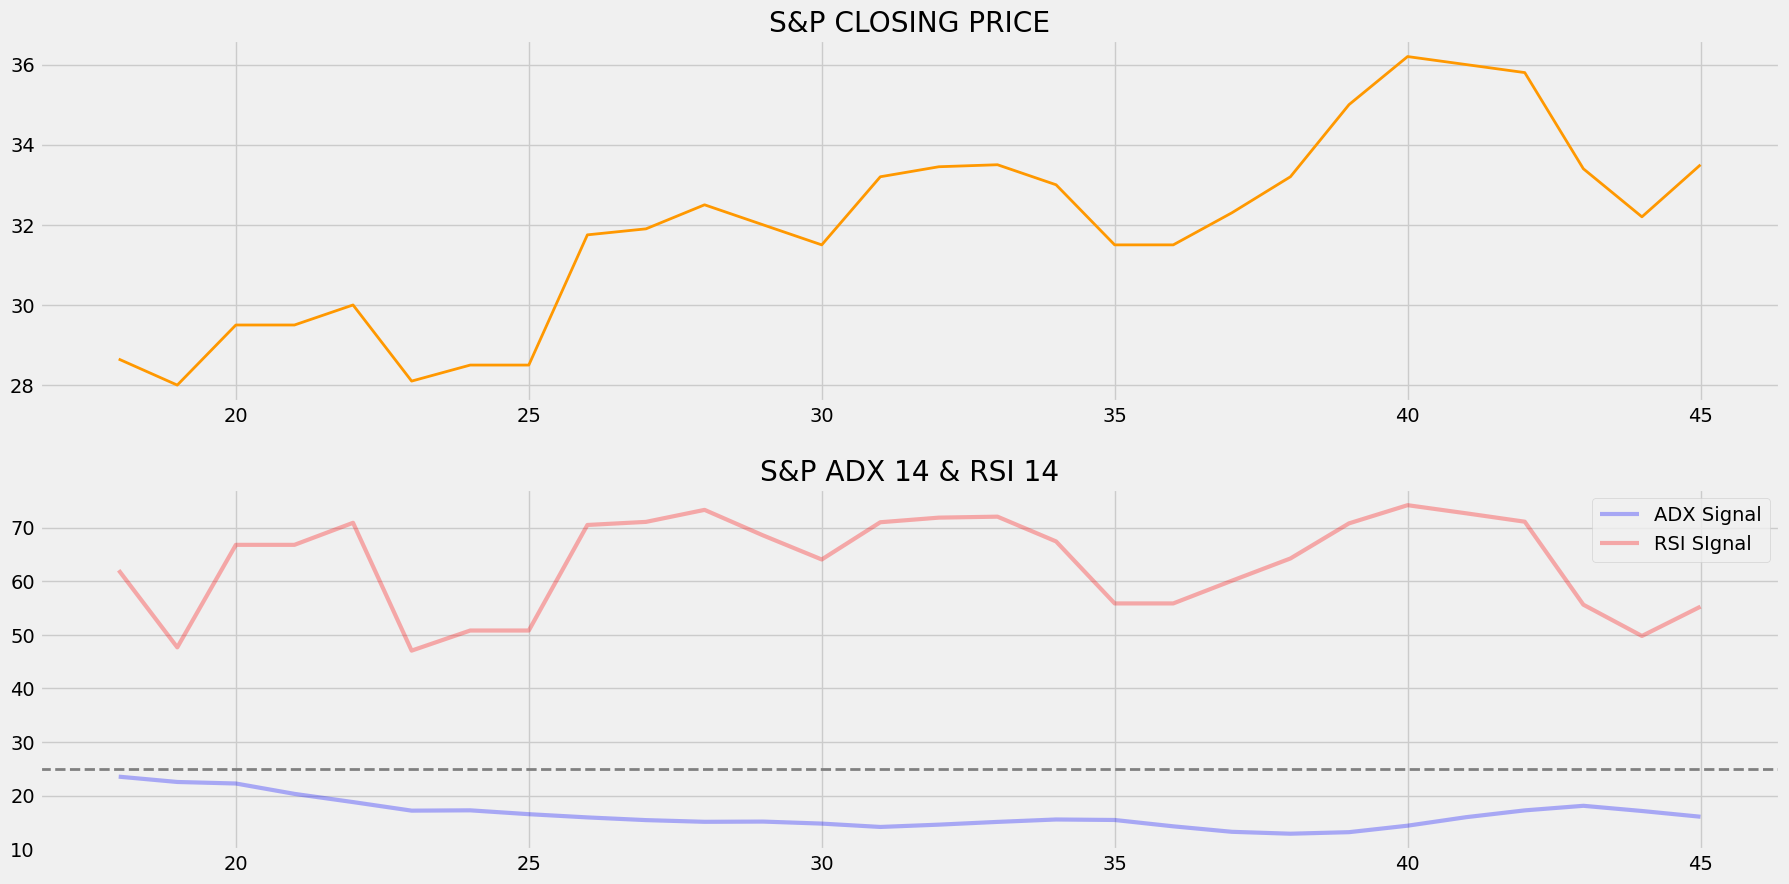

In [ ]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 1)
ax1.plot(data['Close'], linewidth = 2, color = '#ff9800')
ax1.set_title('S&P CLOSING PRICE')
ax2.plot(data['adx'], color = 'Blue', label = 'ADX Signal', linewidth = 3, alpha = 0.3)
ax2.plot(data['rsi_14'], color = 'Red', label = 'RSI SIgnal', linewidth = 3, alpha = 0.3)
# ax2.plot(data['adx'], color = '#2196f3', label = 'ADX 14', linewidth = 3)
ax2.axhline(25, color = 'grey', linewidth = 2, linestyle = '--')
ax2.legend()
ax2.set_title('S&P ADX 14 & RSI 14')
plt.show()

In [ ]:
def adx_rsi_strategy(prices, adx, pdi, ndi, rsi):
    buy_price = []
    sell_price = []
    adx_rsi_signal = []
    signal = 0
    
    for i in range(len(prices)):
        if adx[i] > 35 and pdi[i] < ndi[i] and rsi[i] < 50:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                adx_rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                adx_rsi_signal.append(0)
                
        elif adx[i] > 35 and pdi[i] > ndi[i] and rsi[i] > 50:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                adx_rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                adx_rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            adx_rsi_signal.append(0)
                        
    return buy_price, sell_price, adx_rsi_signal

buy_price, sell_price, adx_rsi_signal = adx_rsi_strategy(list(data['Close']), list(data['adx']), list(data['plus_di']), list(data['minus_di']), list(data['rsi_14']))

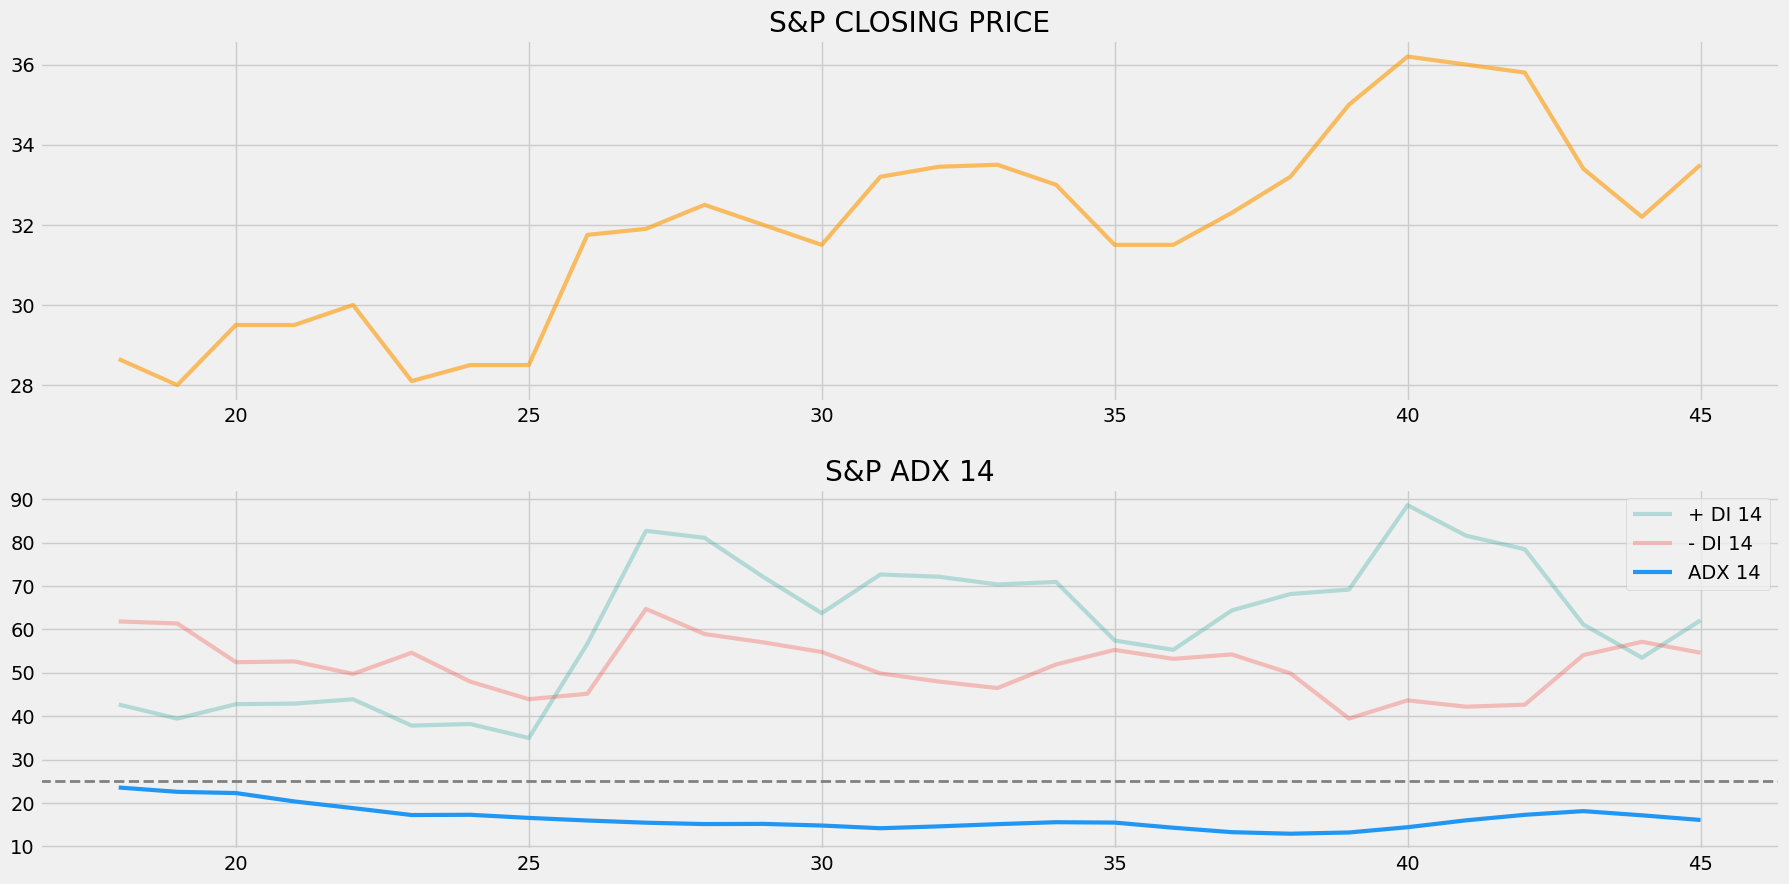

In [ ]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 1)
ax1.plot(data['Close'], linewidth = 3, color = '#ff9800', alpha = 0.6)
ax1.set_title('S&P CLOSING PRICE')
ax1.plot(data.index, buy_price, marker = '^', color = '#26a69a', markersize = 14, linewidth = 0, label = 'BUY SIGNAL')
ax1.plot(data.index, sell_price, marker = 'v', color = '#f44336', markersize = 14, linewidth = 0, label = 'SELL SIGNAL')
ax2.plot(data['plus_di'], color = '#26a69a', label = '+ DI 14', linewidth = 3, alpha = 0.3)
ax2.plot(data['minus_di'], color = '#f44336', label = '- DI 14', linewidth = 3, alpha = 0.3)
ax2.plot(data['adx'], color = '#2196f3', label = 'ADX 14', linewidth = 3)
ax2.axhline(25, color = 'grey', linewidth = 2, linestyle = '--')
ax2.legend()
ax2.set_title('S&P ADX 14')
plt.show()

In [ ]:
position = []
for i in range(len(adx_rsi_signal)):
    if adx_rsi_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(data['Close'])):
    if adx_rsi_signal[i] == 1:
        position[i] = 1
    elif adx_rsi_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
adx = data['adx']
pdi = data['plus_di']
ndi = data['minus_di']
rsi = data['rsi_14'] 
Close_price = data['Close']
adx_rsi_signal = pd.DataFrame(adx_rsi_signal).rename(columns = {0:'adx_rsi_signal'}).set_index(data.index)
position = pd.DataFrame(position).rename(columns = {0:'adx_rsi_position'}).set_index(data.index)

frames = [Close_price, adx, pdi, ndi, rsi, adx_rsi_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Close,adx,plus_di,minus_di,rsi_14,adx_rsi_signal,adx_rsi_position
18,28.65,23.551033,42.686460,61.818875,62.055528,0,1
19,28.00,22.556832,39.417287,61.354871,47.668706,0,1
20,29.50,22.271625,42.754087,52.431748,66.798344,0,1
21,29.50,20.338496,42.892572,52.601580,66.798344,0,1
22,30.00,18.804832,43.870622,49.723355,70.909339,0,1
23,28.10,17.207919,37.815953,54.590025,47.062512,0,1
24,28.50,17.266645,38.188220,47.960639,50.812846,0,1
25,28.50,16.548424,34.953195,43.897767,50.812846,0,1
26,31.75,15.947044,56.688214,45.160389,70.503763,0,1
27,31.90,15.442026,82.694016,64.701781,71.079225,0,1


### Backtesting

In [ ]:
data_ret = pd.DataFrame(np.diff(data['Close'])).rename(columns = {0:'returns'})
adx_rsi_strategy_ret = []
# data_ret= data_ret.reset_index()
for index, row in data_ret.iterrows():
    adx_rsi_strategy_ret.append(row['returns'])
for index, row in data.iterrows(): 
    x= row['Close']
    break 
    
adx_rsi_strategy_ret_df = pd.DataFrame(adx_rsi_strategy_ret).rename(columns = {0:'adx_rsi_returns'})
investment_value = 100000
number_of_stocks = floor(investment_value/x)
adx_rsi_investment_ret = []

for index, row in adx_rsi_strategy_ret_df.iterrows(): 
    returns = number_of_stocks*row['adx_rsi_returns']
    adx_rsi_investment_ret.append(returns)

adx_rsi_investment_ret_df = pd.DataFrame(adx_rsi_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(adx_rsi_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the ADX RSI strategy by investing $100k in data : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the ADX RSI strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the ADX RSI strategy by investing $100k in data : 16926.5
Profit percentage of the ADX RSI strategy : 16%
